# Root Finding

Author: Luke Vaughan

Course: MATH 545 Numerical Analysis I

Instructor: Daniel Poll

College of Charleston

Spring 2021

#### Setup

The following code is written for the purpose of solving the equation $\cos(x) = x$ numerically. One strategy we can use to solve the equation is to find the root of the "test function" $f(x) = x - \cos(x)$. Since the root of the test function is the value for $x$ such that $f(x) = 0$, the root is the solution to $\cos(x) = x$. We are looking for the root that lies somewhere between $x = 0$ and $x = 1$. So we want to find the $x$-value of the red point (see plot below code block 2). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def f(x):
    return x - np.cos(x)  #test function

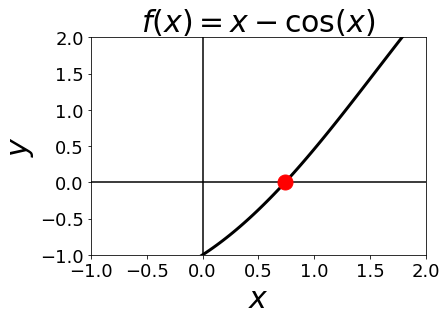

In [2]:
xs = np.linspace(-1,2,100)  #vector of x values
ys = np.zeros(100)  #empty vector of y values

for i in range(len(ys)):
    ys[i] = f(xs[i])  #use test function to fill empty vector of y values
    
fig, ax = plt.subplots()
ax.plot(xs, ys, c = 'black', linewidth = 3)  #plot test function

plt.title('$f(x) = x - \cos(x)$', fontsize = 30)
plt.xlabel('$x$', fontsize = 30)
plt.ylabel('$y$', fontsize = 30)

plt.xlim(-1,2)
plt.ylim(-1,2)

plt.xticks(size=18)
plt.xticks([-1,-0.5,0,0.5,1,1.5,2])
plt.yticks(size=18)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2])

ax.axvline(x = 0, color = 'black')
ax.axhline(y = 0, color = 'black') 

root_result = root(f, 0.5)  #use root function from scipy.optimize (initial guess: 0.5) 

root_x = root_result.x[0]
root_y = f(root_x)
ax.plot(root_x, root_y, 'ro', markersize = 15)  #plot root

Three methods of root finding are shown and compared at the end.

#### Bisection Method

One way to find the root of the test function is to use the Bisection Method. This method is a direct application of the Intermediate Value Theorem.

In code block 3, the `bisect` function is defined, which has three inputs and two outputs. The first two inputs are the endpoints to be used for the Bisection Method (in this case, $x = 0$ and $x = 1$). The third input, `errorTolerance`, is the satisfactory precision at which `bisect` returns its approximation for the root. The two outputs are `root` and `errorEstimate`.

In code block 4, the results are printed. As we can see from the size of `errorEstimate`, the Bisection Method gives us a fairly precise approximation for the solution to $\cos(x) = x$.

In [3]:
def bisect(a, b, errorTolerance):
    c = (a + b)/2                           #midpoint between a, b
    errorBound = c - a                      #error
    i = 0                                   #count number of iterations
    while errorBound > errorTolerance:      #Bisection Method
        if f(a)*f(c) > 0:                   
            a = c                           #new left endpoint
        else:
            b = c                           #new right endpoint
        c = (a + b)/2                       #new midpoint
        errorBound = c - a                  #difference between midpoint and left endpoint
        i = i + 1                           
        print("Iteration", i, ": x =", c, "with estimated error", errorBound)
    return (c, errorBound)

In [4]:
(root, errorEstimate) = bisect(0,1,1e-4)  #use Bisection Method

print()
print("Solution approximation:", root)
print("Error estimation:", errorEstimate)

Iteration 1 : x = 0.75 with estimated error 0.25
Iteration 2 : x = 0.625 with estimated error 0.125
Iteration 3 : x = 0.6875 with estimated error 0.0625
Iteration 4 : x = 0.71875 with estimated error 0.03125
Iteration 5 : x = 0.734375 with estimated error 0.015625
Iteration 6 : x = 0.7421875 with estimated error 0.0078125
Iteration 7 : x = 0.73828125 with estimated error 0.00390625
Iteration 8 : x = 0.740234375 with estimated error 0.001953125
Iteration 9 : x = 0.7392578125 with estimated error 0.0009765625
Iteration 10 : x = 0.73876953125 with estimated error 0.00048828125
Iteration 11 : x = 0.739013671875 with estimated error 0.000244140625
Iteration 12 : x = 0.7391357421875 with estimated error 0.0001220703125
Iteration 13 : x = 0.73907470703125 with estimated error 6.103515625e-05

Solution approximation: 0.73907470703125
Error estimation: 6.103515625e-05


#### Secant Method

Another way to find the root of the test function is to use the Secant Method:

$$x_{i+1} = \frac{x_{i-1}f(x_i) - x_if(x_{i-1})}{f(x_i) - f(x_{i-1})}$$

In code block 5, the `secant` function is defined, which has six inputs and three outputs. The first input, `f`, is the test function. The next two inputs, `x0` and `x1`, defines the interval containing the root (in this case, $0 \leq x \leq 1$). The fourth input, `errorTolerance`, determines the satisfactory precision at which `secant` returns its approximation for the root. The fifth input, `maxIterations`, determines how many iterations are done in the for loop. Finally, the sixth input, `verbose`, is a boolean variable that determines whether or not the program reports the steps it takes to get to the final approximation. 

In code block 6, the endpoints `x0` and `x1` are chosen poorly, so the program tells us to try again.

In code block 7, the endpoints are chosen correctly. The three outputs from the `secant` function are defined as `root`, `errorEstimate`, and `iterations`. Compare the size of `errorEstimate` for the Secant Method and the Bisection Method. Since `errorEstimate` is smaller here, the Secant Method is giving us a better approximaion for the solution.

In [5]:
def secant(f, x0, x1, errorTolerance, maxIterations = 20, verbose = False):
    if np.sign(f(x0)) == np.sign(f(x1)):                   #Intermediate Value Theorem: f(x0), f(x1) should have opposite signs
        print("Try again")                                   
    else: 
        x_prev = x0                                        #initialize x_{i-1}
        x_next = x1                                        #initialize x_i
        for i in range(maxIterations):                     #Secant Method
            fx_prev = f(x_prev)                            #plug x_{i-1} into f
            fx_next = f(x_next)                            #plug x_i into f
            numerator = x_prev*fx_next - (x_next*fx_prev)  #numerator of right-hand side of Secant Method
            denominator = fx_next - fx_prev                #denominator of right-hand side of Secant Method
            quotient = numerator/denominator
            x_prev = x_next                                #set stage for next iteration of Secant Method
            x_next = quotient                              #set x_{i+1} equal to quotient
            errorEstimate = abs(x_next - x_prev)           #difference between subsequent approximations
            if verbose == True:
                print("Iteration", i+1, ": x =", x_next, "with estimated error", errorEstimate)
            if errorEstimate <= errorTolerance:
                return(x_next, errorEstimate, i)

In [6]:
secant(f, 1, 2, 1e-12, verbose = True)  #endpoints chosen poorly: f(1), f(2) have same sign

Try again


In [7]:
(root, errorEstimate, iterations) = secant(f, 0, 1, 1e-12, verbose = True)  #use Secant Method

print()
print("Solution approximation:", root)
print("Error estimation:", errorEstimate)

Iteration 1 : x = 0.6850733573260451 with estimated error 0.31492664267395487
Iteration 2 : x = 0.736298997613654 with estimated error 0.0512256402876089
Iteration 3 : x = 0.7391193619116293 with estimated error 0.002820364297975275
Iteration 4 : x = 0.7390851121274639 with estimated error 3.4249784165441e-05
Iteration 5 : x = 0.7390851332150012 with estimated error 2.1087537382946664e-08
Iteration 6 : x = 0.7390851332151607 with estimated error 1.5942802633617248e-13

Solution approximation: 0.7390851332151607
Error estimation: 1.5942802633617248e-13


#### Newton's Method

Another way to find the root of the test function is to use Newton's Method:

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

In code block 8, the `newton` function is defined, which has six inputs and three outputs. The first two inputs, `f` and `fprime` are the test function and its derivative, respectively. We have $f(x) = x - \cos(x)$ and $f'(x) = 1 + \sin(x)$. The third input, `x0`, is the initial guess for the root. The last three inputs for the `newton` function are comparable to the last three inputs for the `secant` function.

In code block 9, the `fprime` function is defined as $f'(x) = 1 + \sin(x)$. 

In code block 10, the three outputs are stored as `root`, `errorEstimate`, and `iterations`. The value for `errorEstimate` is the smallest we have seen thus far. Therefore, Newton's Method is giving us the best approximation for the solution.

In [8]:
def newton(f, fprime, x0, errorTolerance, maxIterations = 20, verbose = False):
    x = x0                                            #initialize x_i
    for i in range(maxIterations):
        fx = f(x)                                     #plug x_i into f
        fprimex = fprime(x)                           #plug x_i into f'
        quotient = fx/fprimex
        x = x - quotient                              #set x_{i+1} equal to x_i - quotient
        errorEstimate = abs(0.7390851332151606 - x)   #comparison to Wolfram Alpha's solution approximation
        if verbose == True:
            print("Iteration", i+1, ": x =", x, "with estimated error", errorEstimate)
        if errorEstimate <= errorTolerance:
            return(x, errorEstimate, i)

In [9]:
def fprime(x):
    return 1 + np.sin(x)  #derivative of test function

In [10]:
(root, errorEstimate, iterations) = newton(f, fprime, x0 = 1.0, errorTolerance = 1e-12, verbose = True)  #use Newton's Method

print()
print("Solution approximation:", root)
print("Error estimation:", errorEstimate)

Iteration 1 : x = 0.7503638678402439 with estimated error 0.011278734625083331
Iteration 2 : x = 0.7391128909113617 with estimated error 2.77576962011139e-05
Iteration 3 : x = 0.739085133385284 with estimated error 1.701234708662014e-10
Iteration 4 : x = 0.7390851332151607 with estimated error 1.1102230246251565e-16

Solution approximation: 0.7390851332151607
Error estimation: 1.1102230246251565e-16


#### Method Comparison

The results from the three methods are organized in tables below. The values of $x_i$ are the approximations for the solution to $\cos(x) = x$. The values of $e_i$ are the estimations for the error at each iteration. Note that the error is defined differently for each method (Bisection Method: difference between midpoint and left endpoint; Secant Method: difference between subsequent approximations; Newton's Method: comparison to Wolfram Alpha's solution approximation).

Clearly, Newton's Method is the best. These results make sense when we consider the "order of convergence" for each method (Bisection Method: 1; Secant Method: 1.6; Newton's Method: 2). 

#### Bisection Method

|Iteration|$x_i$|$e_i$|
|--------|--------|--------|
|1|0.75|0.25|
|2|0.625|0.125|
|3|0.6875|0.0625|
|4|0.71875|0.03125|
|5|0.734375|0.015625|
|6|0.7421875|0.0078125|
|7|0.73828125|0.00390625|
|8|0.740234375|0.001953125|
|9|0.7392578125|0.0009765625|
|10|0.73876953125|0.00048828125|
|11|0.739013671875|0.000244140625|
|12|0.7391357421875|0.0001220703125|
|13|0.73907470703125|6.103515625e-05|


#### Secant Method

|Iteration|$x_i$|$e_i$|
|--------|--------|--------|
|1|0.6850733573260451|0.31492664267395487|
|2|0.736298997613654|0.0512256402876089|
|3|0.7391193619116293|0.002820364297975275|
|4|0.7390851121274639|3.4249784165441e-05|
|5|0.7390851332150012|2.1087537382946664e-08|
|6|0.7390851332151607|1.5942802633617248e-13|

#### Newton's Method

|Iteration|$x_i$|$e_i$|
|--------|--------|--------|
|1|0.7503638678402439|0.011278734625083331|
|2|0.7391128909113617|2.77576962011139e-05|
|3|0.739085133385284|1.701234708662014e-10|
|4|0.7390851332151607|1.1102230246251565e-16|

#### Conclusion

The solution to $\cos(x) = x$ is $x \approx 0.7390851332151607$.